# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# reference: started 2019-07-21 @ 2:30. Finished at 2019-07-21 @ 10pm.
# reference links
# http://localhost:8888/notebooks/006-Python-APIs/2/Activities/09-Ins_OpenWeatherWrapper/Solved/Ins_OpenWeatherWrapper.ipynb
# http://localhost:8888/notebooks/006-Python-APIs/2/Activities/13-Ins_CitiPy/Solved/Ins_CitiPy_Demo.ipynb


# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json

import openweathermapy.core as owm
from datetime import datetime
from datetime import date

# Import API key
from api_keys import api_key
from config import gkey

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create settings dictionary with information we're interested in
settings = {"units": "imperial", "appid": api_key}


## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)



612

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
url = "api.openweathermap.org/data/2.5/weather?q="+city
current_weather_city = owm.get_current(city, **settings)
summary = ["name","id","coord.lon","coord.lat", "main.temp_max","main.humidity","wind.speed","wind.deg",]
data = current_weather_city(*summary)


# https://stackoverflow.com/questions/31175223/append-a-tuple-to-a-list-whats-the-difference-between-two-ways
# https://stackoverflow.com/questions/16730339/python-add-item-to-the-tuple
# https://realpython.com/python-exceptions/

#cheating to setup dataframe to export to csv
df_wp =pd.DataFrame(columns = [
    "City","Country","City ID","Date","Longitude","Lattitude","Max Temp", "Humidity", "Wind Speed", "Cloudiness"])


set_counter = 1      # counter for sets for display purposes.
record_counter = 1   # counter for record counts for display purposes
index_counter = 0    # index counter per record to populate dataframe
block_counter = 0    # counter of 50 records per set

# set is len(cities) / 50
set_total = round(len(cities)/50,0)
set_total

#url = "api.openweathermap.org/data/2.5/"
#url = "api.openweathermap.org/data/2.5/weather?q="+city
# Print Header Requirement
print(f"Beginning Data Retrieval")
print(f"-------------------------------")


# loop through the cities 

for city in cities:

    try:
        # My Order: summary = ["name","sys.country","dt","coord.lon","coord.lat", "main.temp_max","main.humidity","wind.speed","clouds.all"]
        
        # URL Address should not contain any spaces.
        city_url = city.replace(" ", "%20")
             
        print(f"Processing Record {record_counter} of Set {set_counter} | City ID Number: {id} | City Name: {city.title()} ")
        #print(f'{api.openweathermap.org/data/2.5/weather?q="+{city_url}+"&APPID="+{api_key}}')
        #print(current_weather_city)
        #print(f'{owm.BASE_URL}weather?q={city_url}&units=imperial&APPID={api_key}')
        current_weather_city = owm.get_current(city, **settings)
        
        # mapping API data to dataframe
        df_wp.set_value(index_counter, "City", current_weather_city("name"))
            
        df_wp.set_value(index_counter, "Country", current_weather_city("sys.country"))
        df_wp.set_value(index_counter, "City ID", current_weather_city("id"))
        df_wp.set_value(index_counter, "Date", current_weather_city("dt"))
        df_wp.set_value(index_counter, "Longitude", current_weather_city("coord.lon"))
        df_wp.set_value(index_counter, "Lattitude", current_weather_city("coord.lat"))
        df_wp.set_value(index_counter, "Max Temp", current_weather_city("main.temp_max"))
        df_wp.set_value(index_counter, "Humidity", current_weather_city("main.humidity"))
        df_wp.set_value(index_counter, "Wind Speed", current_weather_city("wind.speed"))
        df_wp.set_value(index_counter, "Cloudiness", current_weather_city("clouds.all"))       
        
        # Increase Counters
        index_counter = index_counter + 1 # index counter starts at 0
        
    except:
        print("City not found. Skipping...")
        #print(current_weather_city)
        #print(f'{owm.BASE_URL}weather?q={city_url}&units=imperial&APPID={api_key}'    
    record_counter = record_counter + 1 # record counter starts at 1 for display purposes
    block_counter = block_counter + 1
    
    if block_counter ==50: # loop goes to 50 records per set. increate set counter by 1.
        block_counter = 1 # reset block counter for next set of 50.
        set_counter = set_counter + 1 
        
        
        
# Print Footer Requirement
print(f"-------------------------------")
print(f"Data Retrieval Complete")
print(f"-------------------------------")






Beginning Data Retrieval
-------------------------------
Processing Record 1 of Set 1 | City ID Number: <built-in function id> | City Name: New Norfolk 


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:49: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:51: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:52: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:53: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Program Files (x86)\Microsoft Visual Studio\Shared\An

Processing Record 2 of Set 1 | City ID Number: <built-in function id> | City Name: Tanggu 
City not found. Skipping...
Processing Record 3 of Set 1 | City ID Number: <built-in function id> | City Name: College 
Processing Record 4 of Set 1 | City ID Number: <built-in function id> | City Name: Saint Anthony 
Processing Record 5 of Set 1 | City ID Number: <built-in function id> | City Name: Punta Arenas 
Processing Record 6 of Set 1 | City ID Number: <built-in function id> | City Name: Saldanha 
Processing Record 7 of Set 1 | City ID Number: <built-in function id> | City Name: Umzimvubu 
City not found. Skipping...
Processing Record 8 of Set 1 | City ID Number: <built-in function id> | City Name: Jamestown 
Processing Record 9 of Set 1 | City ID Number: <built-in function id> | City Name: Pisco 
Processing Record 10 of Set 1 | City ID Number: <built-in function id> | City Name: Souillac 
Processing Record 11 of Set 1 | City ID Number: <built-in function id> | City Name: Port Elizabeth 
P

Processing Record 88 of Set 2 | City ID Number: <built-in function id> | City Name: Wazzan 
City not found. Skipping...
Processing Record 89 of Set 2 | City ID Number: <built-in function id> | City Name: Nikolskoye 
Processing Record 90 of Set 2 | City ID Number: <built-in function id> | City Name: Chuy 
Processing Record 91 of Set 2 | City ID Number: <built-in function id> | City Name: Qaanaaq 
Processing Record 92 of Set 2 | City ID Number: <built-in function id> | City Name: Mount Isa 
Processing Record 93 of Set 2 | City ID Number: <built-in function id> | City Name: Kindu 
Processing Record 94 of Set 2 | City ID Number: <built-in function id> | City Name: Pervomayskoye 
Processing Record 95 of Set 2 | City ID Number: <built-in function id> | City Name: Goundi 
Processing Record 96 of Set 2 | City ID Number: <built-in function id> | City Name: Aktau 
Processing Record 97 of Set 2 | City ID Number: <built-in function id> | City Name: Mont-Dore 
Processing Record 98 of Set 2 | City I

Processing Record 172 of Set 4 | City ID Number: <built-in function id> | City Name: Oytal 
Processing Record 173 of Set 4 | City ID Number: <built-in function id> | City Name: Kannauj 
Processing Record 174 of Set 4 | City ID Number: <built-in function id> | City Name: Vila Franca Do Campo 
Processing Record 175 of Set 4 | City ID Number: <built-in function id> | City Name: San Quintin 
Processing Record 176 of Set 4 | City ID Number: <built-in function id> | City Name: Klaksvik 
Processing Record 177 of Set 4 | City ID Number: <built-in function id> | City Name: Barentsburg 
City not found. Skipping...
Processing Record 178 of Set 4 | City ID Number: <built-in function id> | City Name: Whitehorse 
Processing Record 179 of Set 4 | City ID Number: <built-in function id> | City Name: Rio Gallegos 
Processing Record 180 of Set 4 | City ID Number: <built-in function id> | City Name: Gurupi 
Processing Record 181 of Set 4 | City ID Number: <built-in function id> | City Name: Karratha 
Proc

City not found. Skipping...
Processing Record 256 of Set 6 | City ID Number: <built-in function id> | City Name: Bargal 
City not found. Skipping...
Processing Record 257 of Set 6 | City ID Number: <built-in function id> | City Name: Saint-Francois 
Processing Record 258 of Set 6 | City ID Number: <built-in function id> | City Name: Monrovia 
Processing Record 259 of Set 6 | City ID Number: <built-in function id> | City Name: Neuquen 
Processing Record 260 of Set 6 | City ID Number: <built-in function id> | City Name: Petropavl 
Processing Record 261 of Set 6 | City ID Number: <built-in function id> | City Name: Vagur 
Processing Record 262 of Set 6 | City ID Number: <built-in function id> | City Name: Darhan 
Processing Record 263 of Set 6 | City ID Number: <built-in function id> | City Name: Nara 
Processing Record 264 of Set 6 | City ID Number: <built-in function id> | City Name: Mpongwe 
Processing Record 265 of Set 6 | City ID Number: <built-in function id> | City Name: Koumac 
Pr

Processing Record 338 of Set 7 | City ID Number: <built-in function id> | City Name: Lensk 
Processing Record 339 of Set 7 | City ID Number: <built-in function id> | City Name: Houston 
Processing Record 340 of Set 7 | City ID Number: <built-in function id> | City Name: Amahai 
Processing Record 341 of Set 7 | City ID Number: <built-in function id> | City Name: Kleck 
City not found. Skipping...
Processing Record 342 of Set 7 | City ID Number: <built-in function id> | City Name: Deputatskiy 
Processing Record 343 of Set 7 | City ID Number: <built-in function id> | City Name: Mae Sot 
Processing Record 344 of Set 7 | City ID Number: <built-in function id> | City Name: Nome 
Processing Record 345 of Set 8 | City ID Number: <built-in function id> | City Name: Poum 
Processing Record 346 of Set 8 | City ID Number: <built-in function id> | City Name: Macheng 
Processing Record 347 of Set 8 | City ID Number: <built-in function id> | City Name: Isilkul 
Processing Record 348 of Set 8 | City I

Processing Record 422 of Set 9 | City ID Number: <built-in function id> | City Name: Kamenka 
Processing Record 423 of Set 9 | City ID Number: <built-in function id> | City Name: Ola 
Processing Record 424 of Set 9 | City ID Number: <built-in function id> | City Name: Nogliki 
Processing Record 425 of Set 9 | City ID Number: <built-in function id> | City Name: Aykhal 
Processing Record 426 of Set 9 | City ID Number: <built-in function id> | City Name: Son La 
Processing Record 427 of Set 9 | City ID Number: <built-in function id> | City Name: Uvalde 
Processing Record 428 of Set 9 | City ID Number: <built-in function id> | City Name: Minsk 
Processing Record 429 of Set 9 | City ID Number: <built-in function id> | City Name: Khani 
Processing Record 430 of Set 9 | City ID Number: <built-in function id> | City Name: Meulaboh 
Processing Record 431 of Set 9 | City ID Number: <built-in function id> | City Name: Loutros 
Processing Record 432 of Set 9 | City ID Number: <built-in function id

Processing Record 507 of Set 11 | City ID Number: <built-in function id> | City Name: Trat 
Processing Record 508 of Set 11 | City ID Number: <built-in function id> | City Name: Diofior 
Processing Record 509 of Set 11 | City ID Number: <built-in function id> | City Name: Edd 
Processing Record 510 of Set 11 | City ID Number: <built-in function id> | City Name: Rabo De Peixe 
Processing Record 511 of Set 11 | City ID Number: <built-in function id> | City Name: Canto Do Buriti 
Processing Record 512 of Set 11 | City ID Number: <built-in function id> | City Name: Necochea 
Processing Record 513 of Set 11 | City ID Number: <built-in function id> | City Name: Nioro 
Processing Record 514 of Set 11 | City ID Number: <built-in function id> | City Name: Husavik 
Processing Record 515 of Set 11 | City ID Number: <built-in function id> | City Name: Dhidhdhoo 
Processing Record 516 of Set 11 | City ID Number: <built-in function id> | City Name: Ranong 
Processing Record 517 of Set 11 | City ID N

Processing Record 590 of Set 13 | City ID Number: <built-in function id> | City Name: Tatarsk 
Processing Record 591 of Set 13 | City ID Number: <built-in function id> | City Name: Ondjiva 
Processing Record 592 of Set 13 | City ID Number: <built-in function id> | City Name: Batagay 
Processing Record 593 of Set 13 | City ID Number: <built-in function id> | City Name: Macrohon 
Processing Record 594 of Set 13 | City ID Number: <built-in function id> | City Name: Koulamoutou 
Processing Record 595 of Set 13 | City ID Number: <built-in function id> | City Name: Hachinohe 
Processing Record 596 of Set 13 | City ID Number: <built-in function id> | City Name: Trofors 
Processing Record 597 of Set 13 | City ID Number: <built-in function id> | City Name: Ferrol 
Processing Record 598 of Set 13 | City ID Number: <built-in function id> | City Name: Neryungri 
Processing Record 599 of Set 13 | City ID Number: <built-in function id> | City Name: Dalvik 
Processing Record 600 of Set 13 | City ID N

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
# Reference Link: https://datatofish.com/export-dataframe-to-csv/

export_csv = df_wp.to_csv (output_data_file, encoding='utf-8', index=False, header=True)

# have put in my own sort column order, more logical by "grouping". Parameters at the end versus alphabetical.
df_wp.head()

,City,Country,City ID,Date,Longitude,Lattitude,Max Temp,Humidity,Wind Speed,Cloudiness
0,New Norfolk,AU,2155415,1563762097,147.06,-42.78,63,54,21.92,75
1,College,US,5859699,1563762007,-147.8,64.86,77,36,9.17,1
2,Saint Anthony,US,5606187,1563762098,-111.68,43.97,87.8,25,3.36,1
3,Punta Arenas,CL,3874787,1563762098,-70.91,-53.16,35.6,83,13.87,75
4,Saldanha,PT,2737599,1563762098,-6.55,41.42,68.69,66,4.72,0


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,lompoc,1,US,1534984500,44,34.64,-120.46,77.00,11.41
1,klaksvik,92,FO,1534983600,100,62.23,-6.59,50.00,13.87
2,bisignano,0,IT,1534981800,88,39.50,16.27,66.20,5.82
3,hilo,90,US,1534984860,90,19.71,-155.08,77.00,8.05
4,rikitea,8,PF,1534986579,100,-23.12,-134.97,69.58,19.71


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

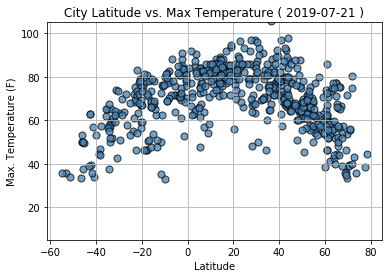

In [8]:
# Build a scatter plot for each data type
# https://matplotlib.org/2.0.2/examples/color/named_colors.html
plt.scatter(df_wp["Lattitude"], df_wp["Max Temp"], c=["steelblue"],marker="o", s=50, alpha=0.75, edgecolors="black")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature ( {date.today()} )")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.ylim(5, 105)
plt.grid(True)

# Save the figure
plt.savefig("2019-BJL-WeatherPy-lat-vs-temp.jpg", dpi=None, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches='tight', pad_inches=0.1,
        frameon=None, metadata=None)

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

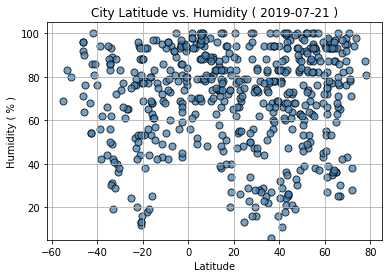

In [9]:
# Build a scatter plot for each data type
# https://matplotlib.org/2.0.2/examples/color/named_colors.html
plt.scatter(df_wp["Lattitude"], df_wp["Humidity"], c=["steelblue"],marker="o", s=50, alpha=0.75, edgecolors="black")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity ( {date.today()} )")
plt.ylabel("Humidity ( % )")
plt.xlabel("Latitude")
plt.ylim(5, 105)
plt.xlim(-62,85)
plt.grid(True)

# Save the figure
plt.savefig("2019-BJL-WeatherPy-lat-vs-hum.jpg", dpi=None, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches='tight', pad_inches=0.1,
        frameon=None, metadata=None)

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

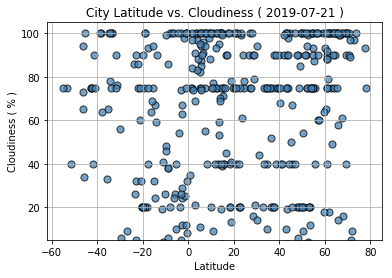

In [10]:
# Build a scatter plot for each data type
# https://matplotlib.org/2.0.2/examples/color/named_colors.html
plt.scatter(df_wp["Lattitude"], df_wp["Cloudiness"], c=["steelblue"],marker="o", s=50, alpha=0.75, edgecolors="black")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness ( {date.today()} )")
plt.ylabel("Cloudiness ( % )")
plt.xlabel("Latitude")
plt.ylim(5, 105)
plt.xlim(-62,85)
plt.grid(True)

# Save the figure
plt.savefig("2019-BJL-WeatherPy-lat-vs-cloud.jpg", dpi=None, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches='tight', pad_inches=0.1,
        frameon=None, metadata=None)

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

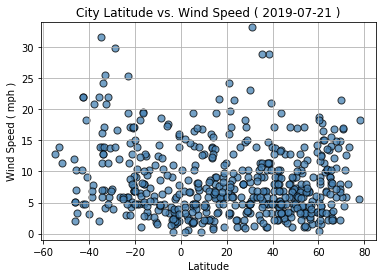

In [11]:
# Build a scatter plot for each data type
# https://matplotlib.org/2.0.2/examples/color/named_colors.html
plt.scatter(df_wp["Lattitude"], df_wp["Wind Speed"], c=["steelblue"],marker="o", s=50, alpha=0.75, edgecolors="black")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed ( {date.today()} )")
plt.ylabel("Wind Speed ( mph )")
plt.xlabel("Latitude")
plt.ylim(-1, 34)
plt.xlim(-61,85)
plt.grid(True)

# Save the figure
plt.savefig("2019-BJL-WeatherPy-lat-vs-win.jpg", dpi=None, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches='tight', pad_inches=0.1,
        frameon=None, metadata=None)

# Show plot
plt.show()